In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates 
from datetime import datetime
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\vghat\Desktop\VinayProjects\Walmart_Store_sales.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Viewing Data Information

In [5]:
# Specify the format as day-month-year using the format parameter
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

# Alternative approach if your dates are inconsistent:
# df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### Checking for missing values

In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Splitting date column into day, month and year :

In [8]:
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


### Analysis

### Which store has Maximum Sales?

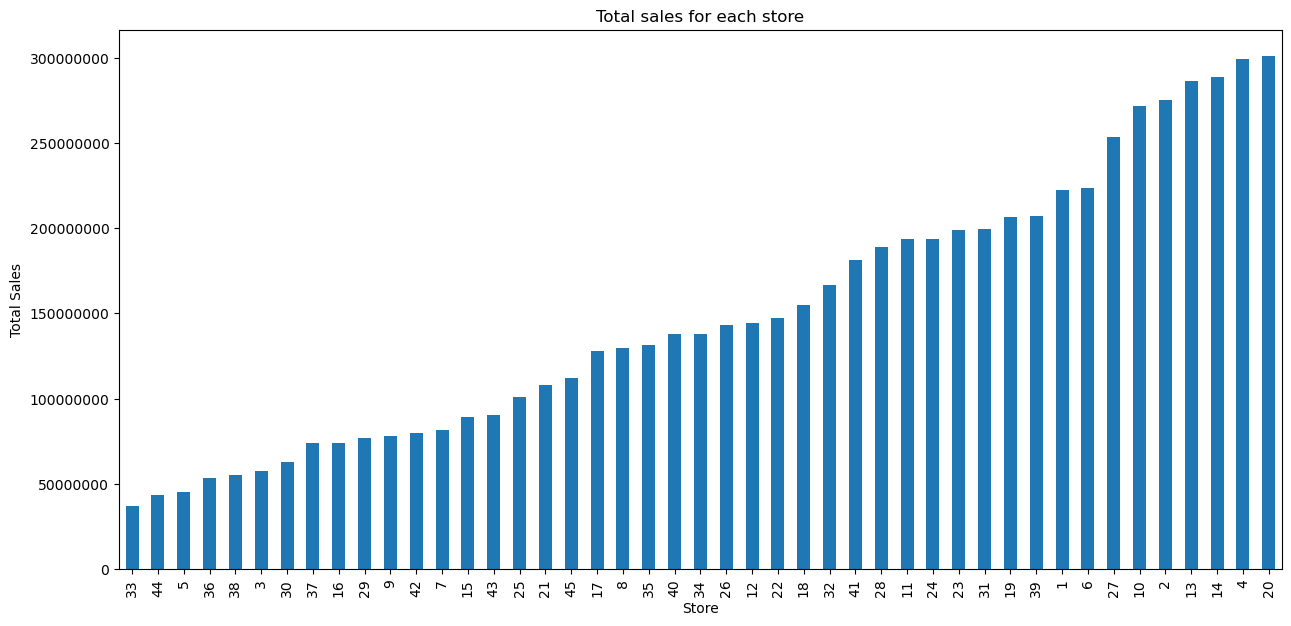

In [16]:
total_sales= df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_array = np.array(total_sales)
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar')
plt.show()

In [18]:
(int(df_std.head(1).index[0]), float(df_std.head(1).Weekly_Sales[df_std.head(1).index[0]]))

(14, 317569.9494755081)

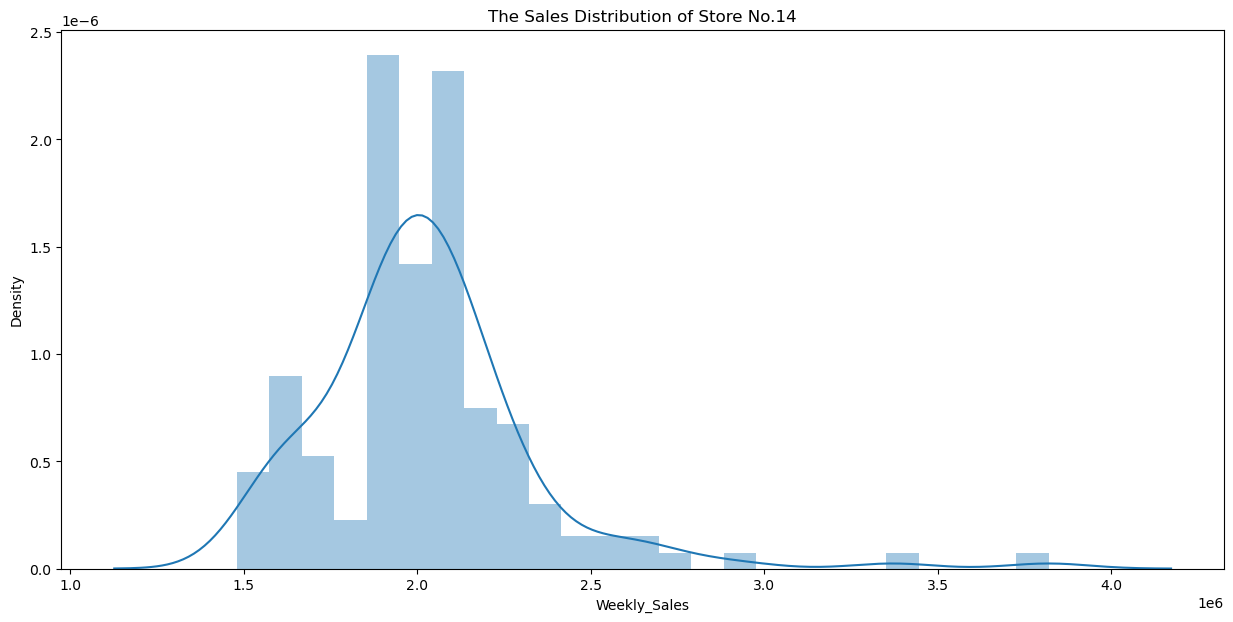

In [22]:
# Extracting the sales data for store number 14 and plotting its distribution
plt.figure(figsize=(15,7))
sns.distplot(df[df['Store'] == df_std.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store No.'+ str(df_std.head(1).index[0]))
import warnings
warnings.filterwarnings('ignore')
plt.show()

In [23]:
#Calculating the coefficient of mean to standard deviation
coef = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean())
coef = coef.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_max = coef.sort_values(by='Coefficient of mean to standard deviation',ascending=False)
coef_max.head(7)

,Coefficient of mean to standard deviation
Store,
35,0.229681
7,0.197305
15,0.193384
29,0.183742
23,0.179721
21,0.170292
45,0.165613


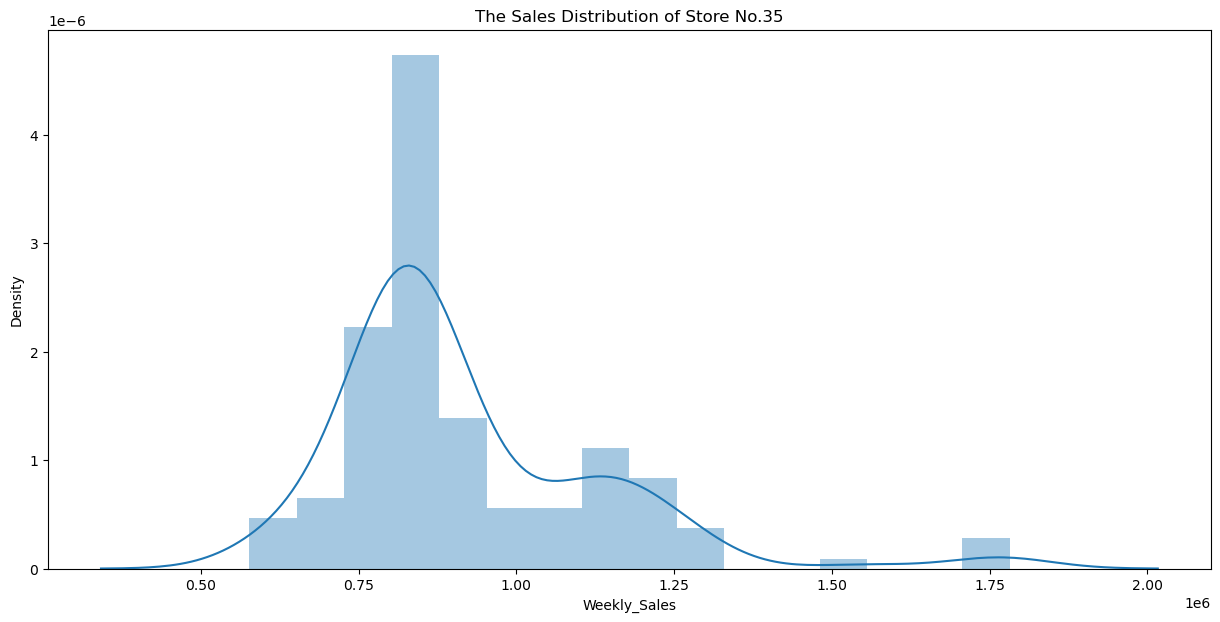

In [26]:
# Distribution of store 35 has maximum coefficient of mean to standard deviation
plt.figure(figsize=(15,7))
sns.distplot(df[df['Store'] == coef_max.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store No.'+str(coef_max.head(1).index[0]))
import warnings
warnings.filterwarnings('ignore')
plt.show()

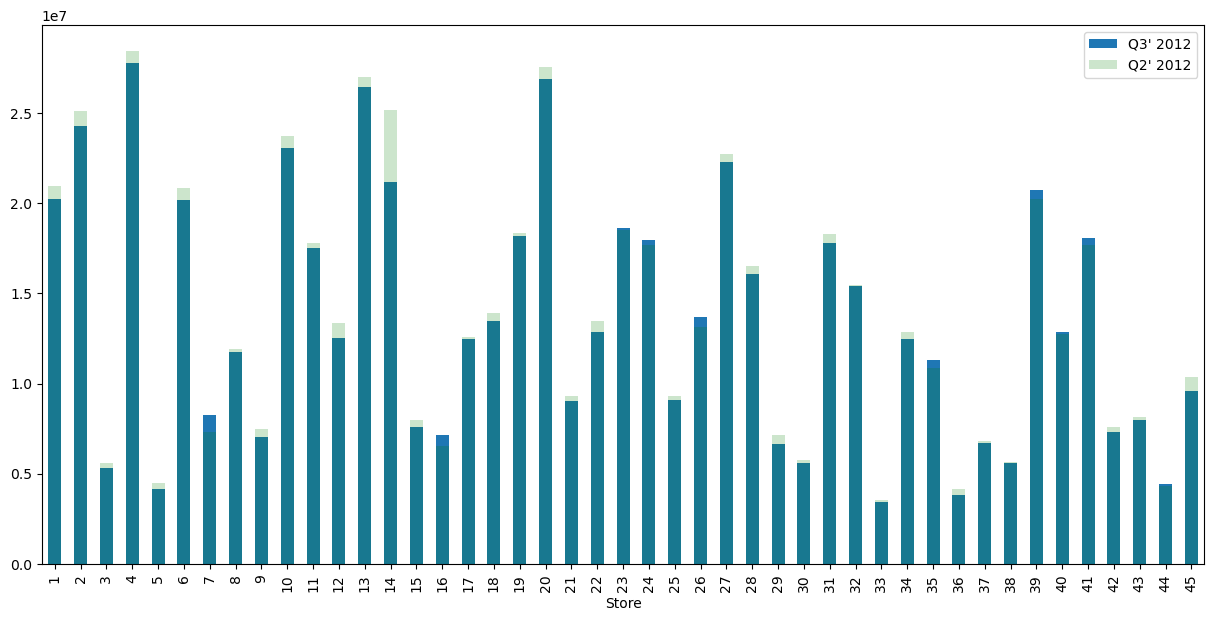

In [30]:
# Sales for second and third quarter in 2012
quarter_2_sales = df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
quarter_3_sales= df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Plotting the difference between sales for second and third quarterly
plt.figure(figsize=(15,7))
quarter_2_sales.plot(ax=quarter_3_sales.plot(kind ='bar'),kind='bar',color='g',alpha=0.2,legend=True)
plt.legend(["Q3' 2012", "Q2' 2012"])
plt.show()

In [31]:
#Calculating Growth rate in Q3'2012
quarter_2_sales= df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
quarter_3_sales= df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()
quarterly_growth_rate = ((quarter_3_sales - quarter_2_sales )/quarter_2_sales)*100
quarterly_growth_rate.sort_values(ascending=False).head()

Store
7     13.330776
16     8.488378
35     4.466637
26     3.955478
39     2.478404
Name: Weekly_Sales, dtype: float64

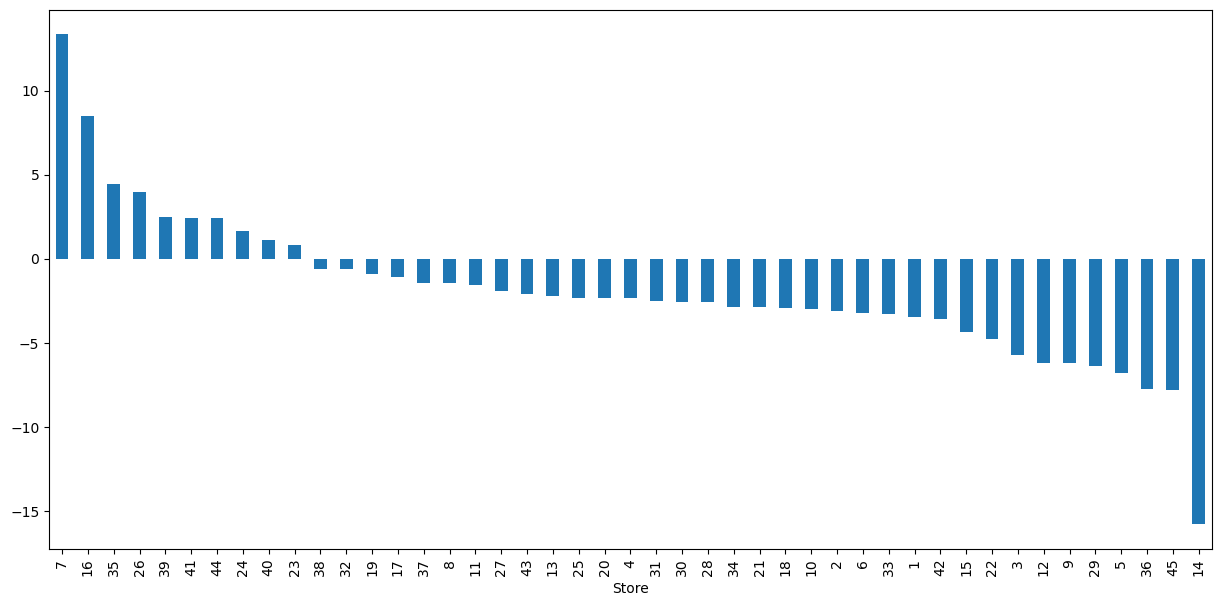

In [32]:
plt.figure(figsize=(15,7))
quarterly_growth_rate.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [33]:
#Defining holiday dates
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [34]:
#Calculating mean sales on holidays : 
Super_Bowl_Sales = (pd.DataFrame(df.loc[df.Date.isin(Super_Bowl)]))['Weekly_Sales'].mean()
Labour_Day_Sales = (pd.DataFrame(df.loc[df.Date.isin(Labour_Day)]))['Weekly_Sales'].mean()
Thanksgiving_Sales = (pd.DataFrame(df.loc[df.Date.isin(Thanksgiving)]))['Weekly_Sales'].mean()
Christmas_Sales = (pd.DataFrame(df.loc[df.Date.isin(Christmas)]))['Weekly_Sales'].mean()
Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales

(nan,
 np.float64(1039182.8339999999),
 np.float64(1471273.427777778),
 np.float64(960833.1115555555))

In [35]:
#Calculating mean sales on non-holidays :
Non_Holiday_Sales = df[df['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()
Non_Holiday_Sales

np.float64(1041256.3802088555)

In [36]:
Mean_Sales = {'Super_Bowl_Sales' : Super_Bowl_Sales,
              'Labour_Day_Sales': Labour_Day_Sales,
              'Thanksgiving_Sales':Thanksgiving_Sales,
              'Christmas_Sales': Christmas_Sales,
              'Non_Holiday_Sales': Non_Holiday_Sales}
Mean_Sales 

{'Super_Bowl_Sales': nan,
 'Labour_Day_Sales': np.float64(1039182.8339999999),
 'Thanksgiving_Sales': np.float64(1471273.427777778),
 'Christmas_Sales': np.float64(960833.1115555555),
 'Non_Holiday_Sales': np.float64(1041256.3802088555)}

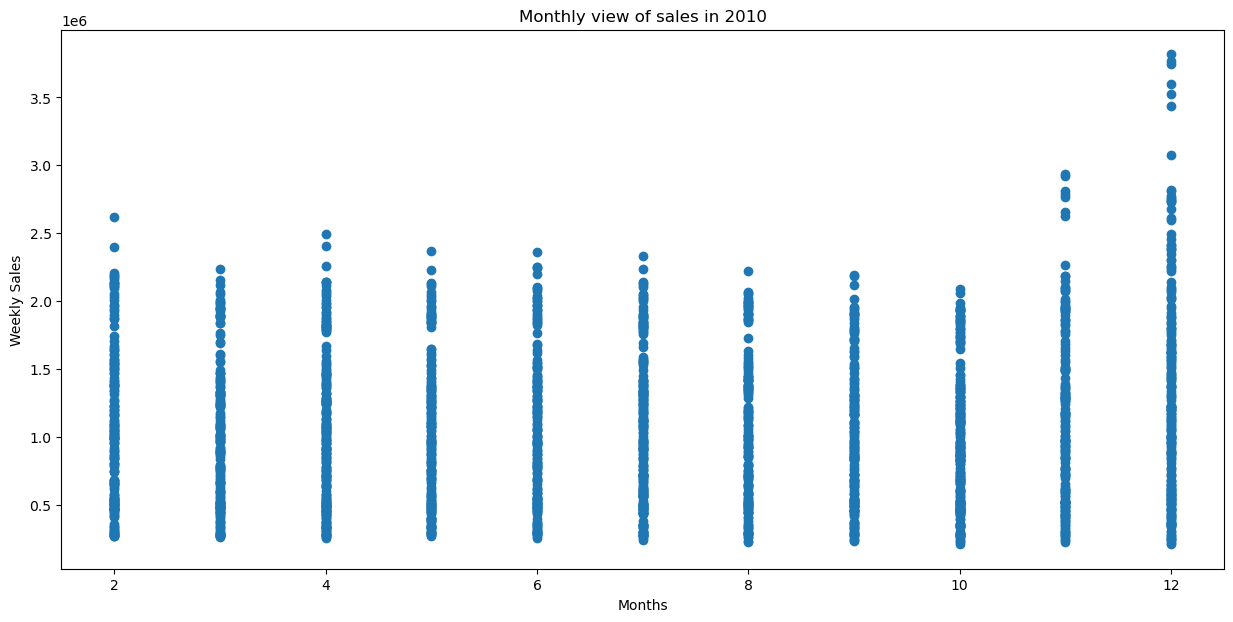

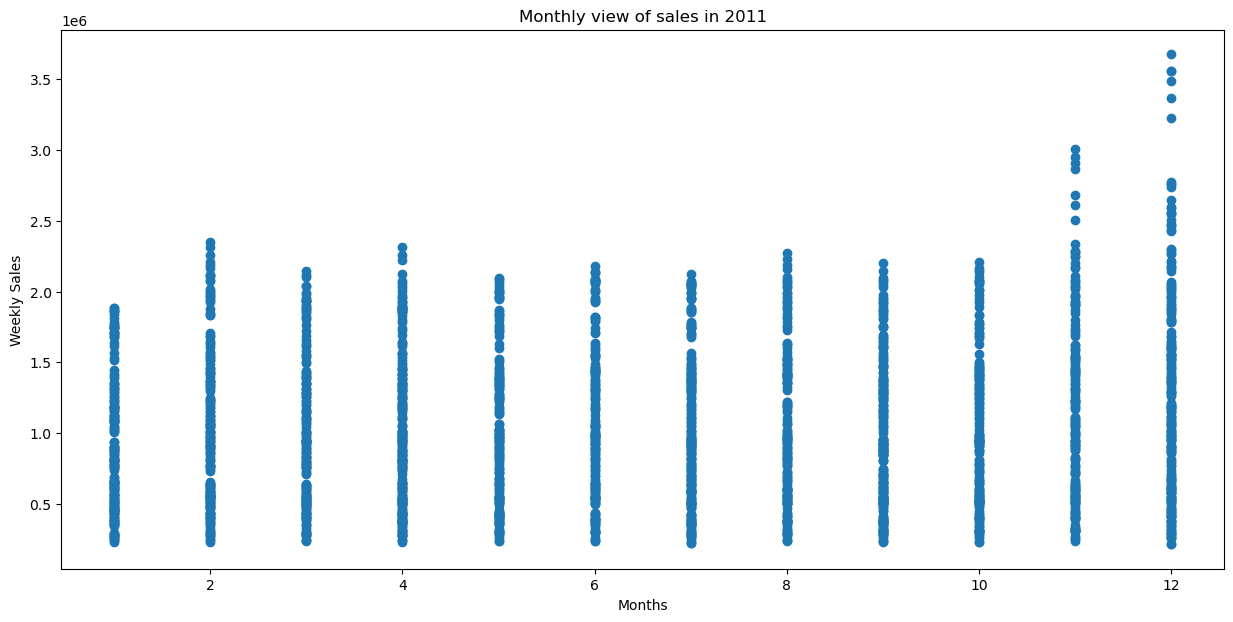

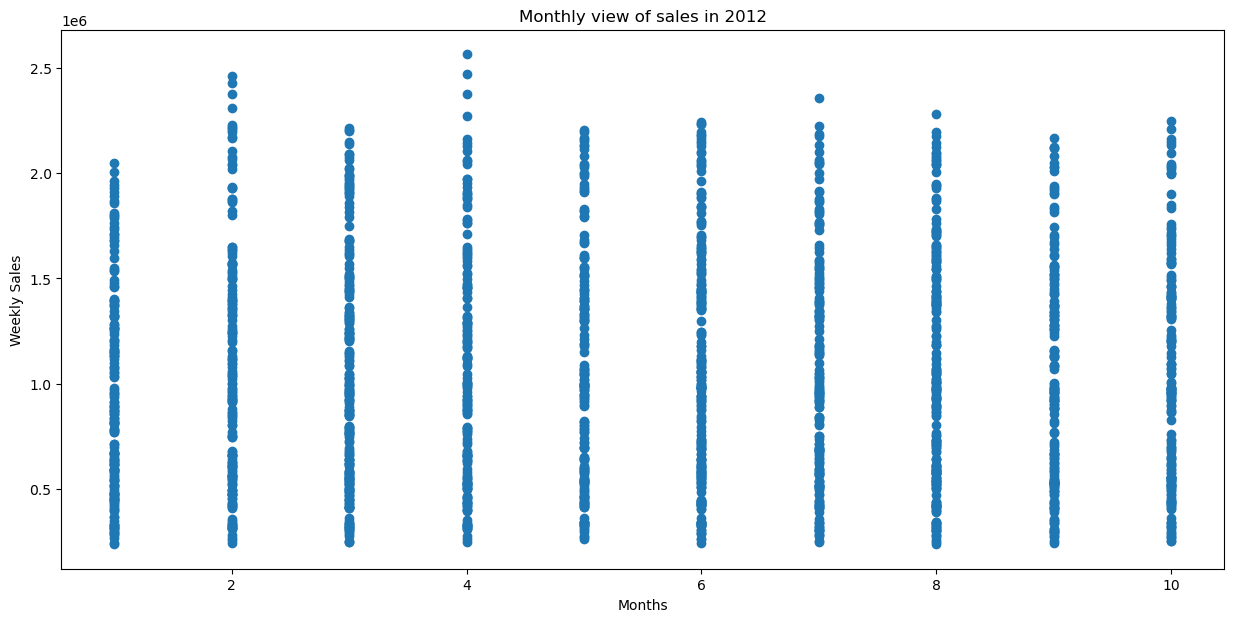

In [37]:
#Year-wise Monthly Sales

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2010]["Month"],df[df.Year==2010]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2011]["Month"],df[df.Year==2011]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2012]["Month"],df[df.Year==2012]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

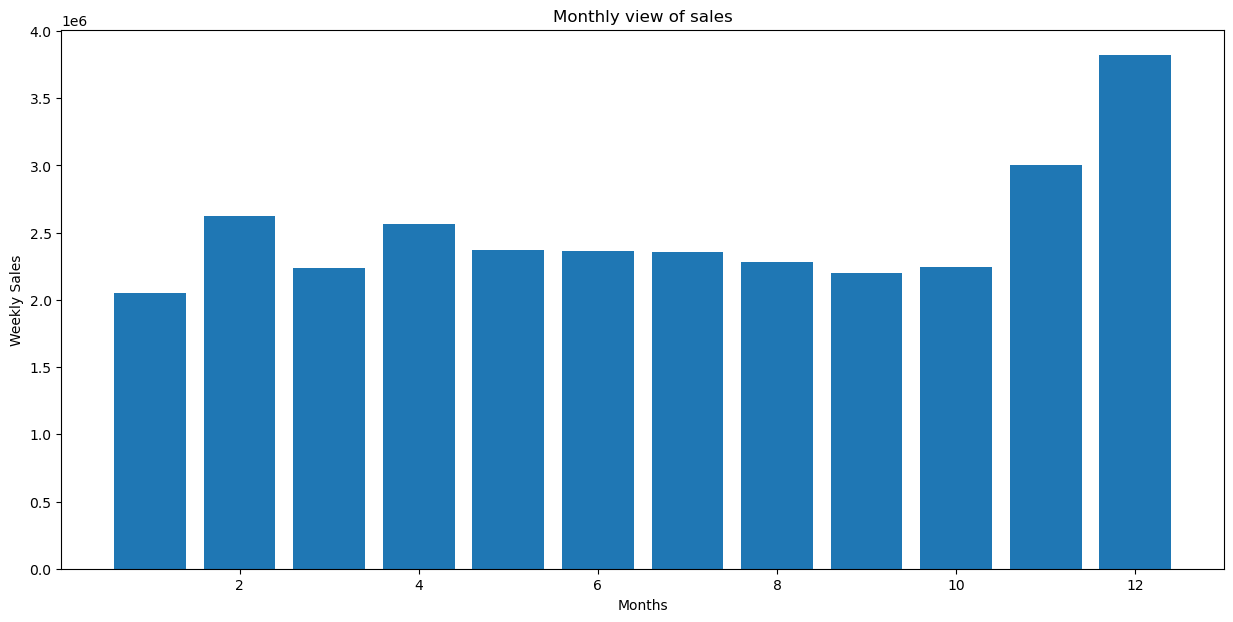

In [38]:
#Overall Monthly Sales
plt.figure(figsize=(15,7))
plt.bar(df["Month"],df["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")
plt.show()

<Figure size 1500x700 with 0 Axes>

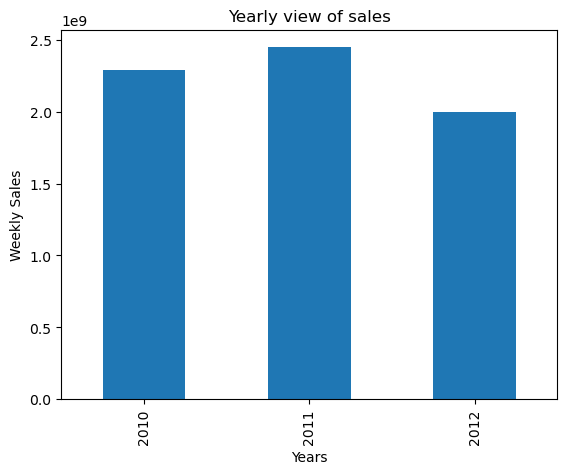

In [39]:
#Yearly Sales
plt.figure(figsize=(15,7))
df.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("Years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales")
plt.show()

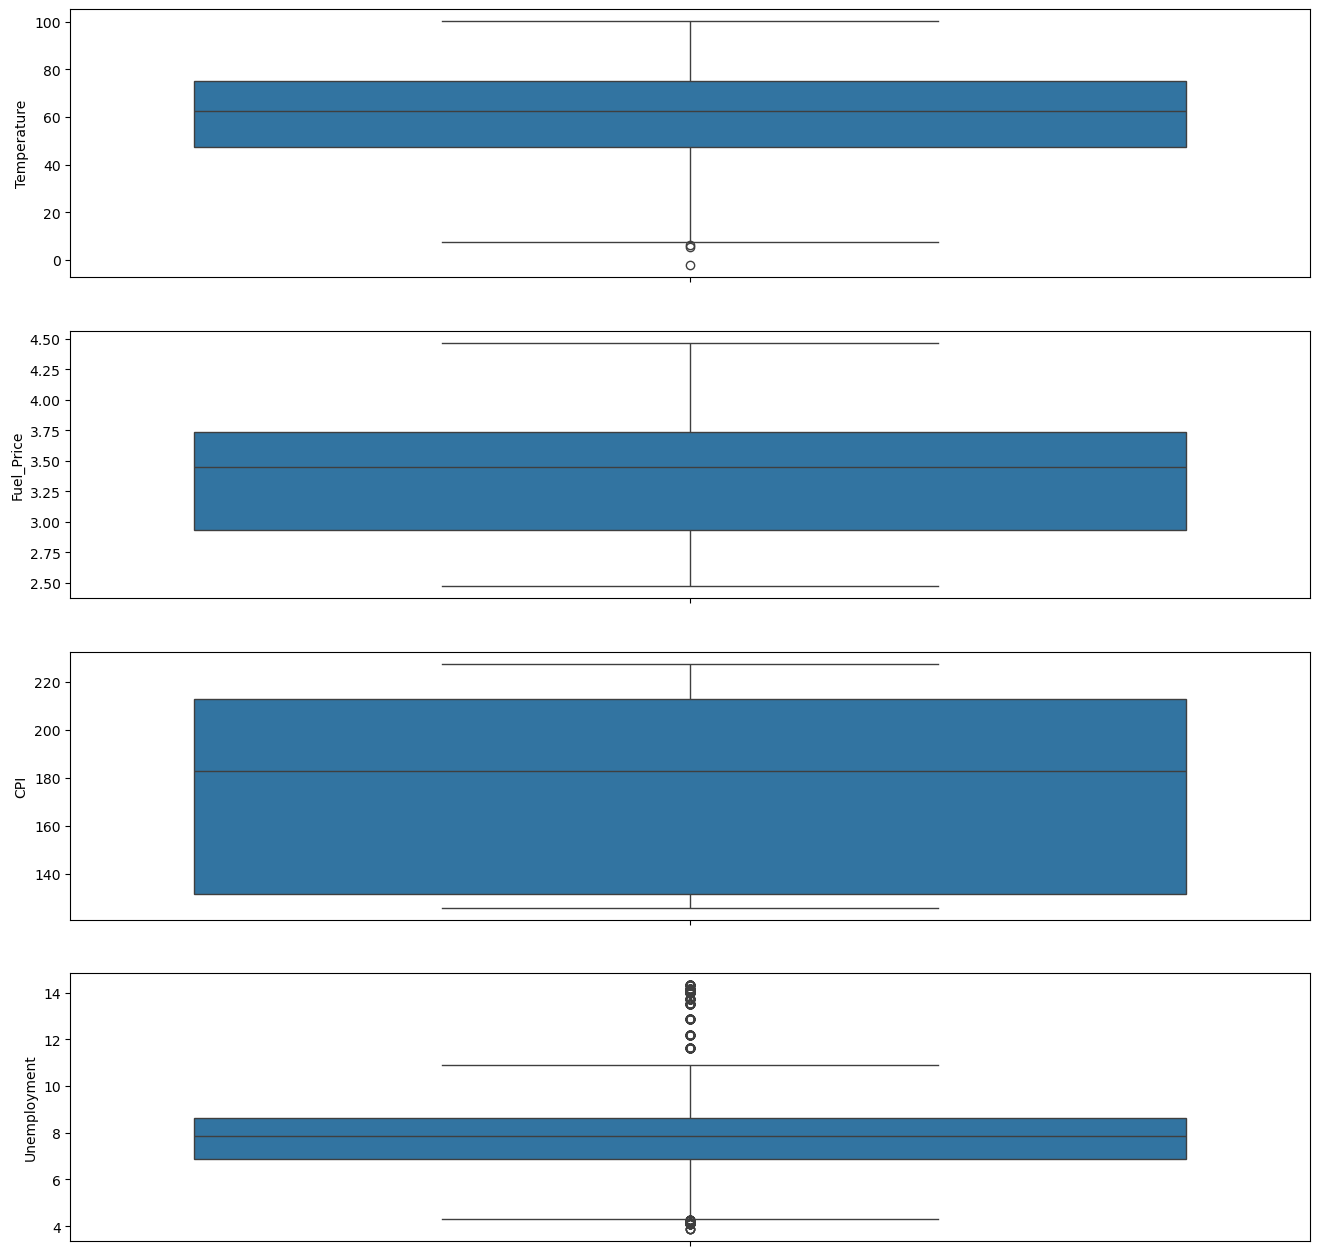

In [43]:
#Detecting outliers :
fig, axis = plt.subplots(4,figsize=(16,16))
X = df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df[column],ax=axis[i])
    
import warnings
warnings.filterwarnings('ignore')
plt.show()

In [44]:
# Dropping outliers     
df_clean = df[(df['Unemployment']<10) & (df['Unemployment']>4.5) & (df['Temperature']>10)]
df_clean

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


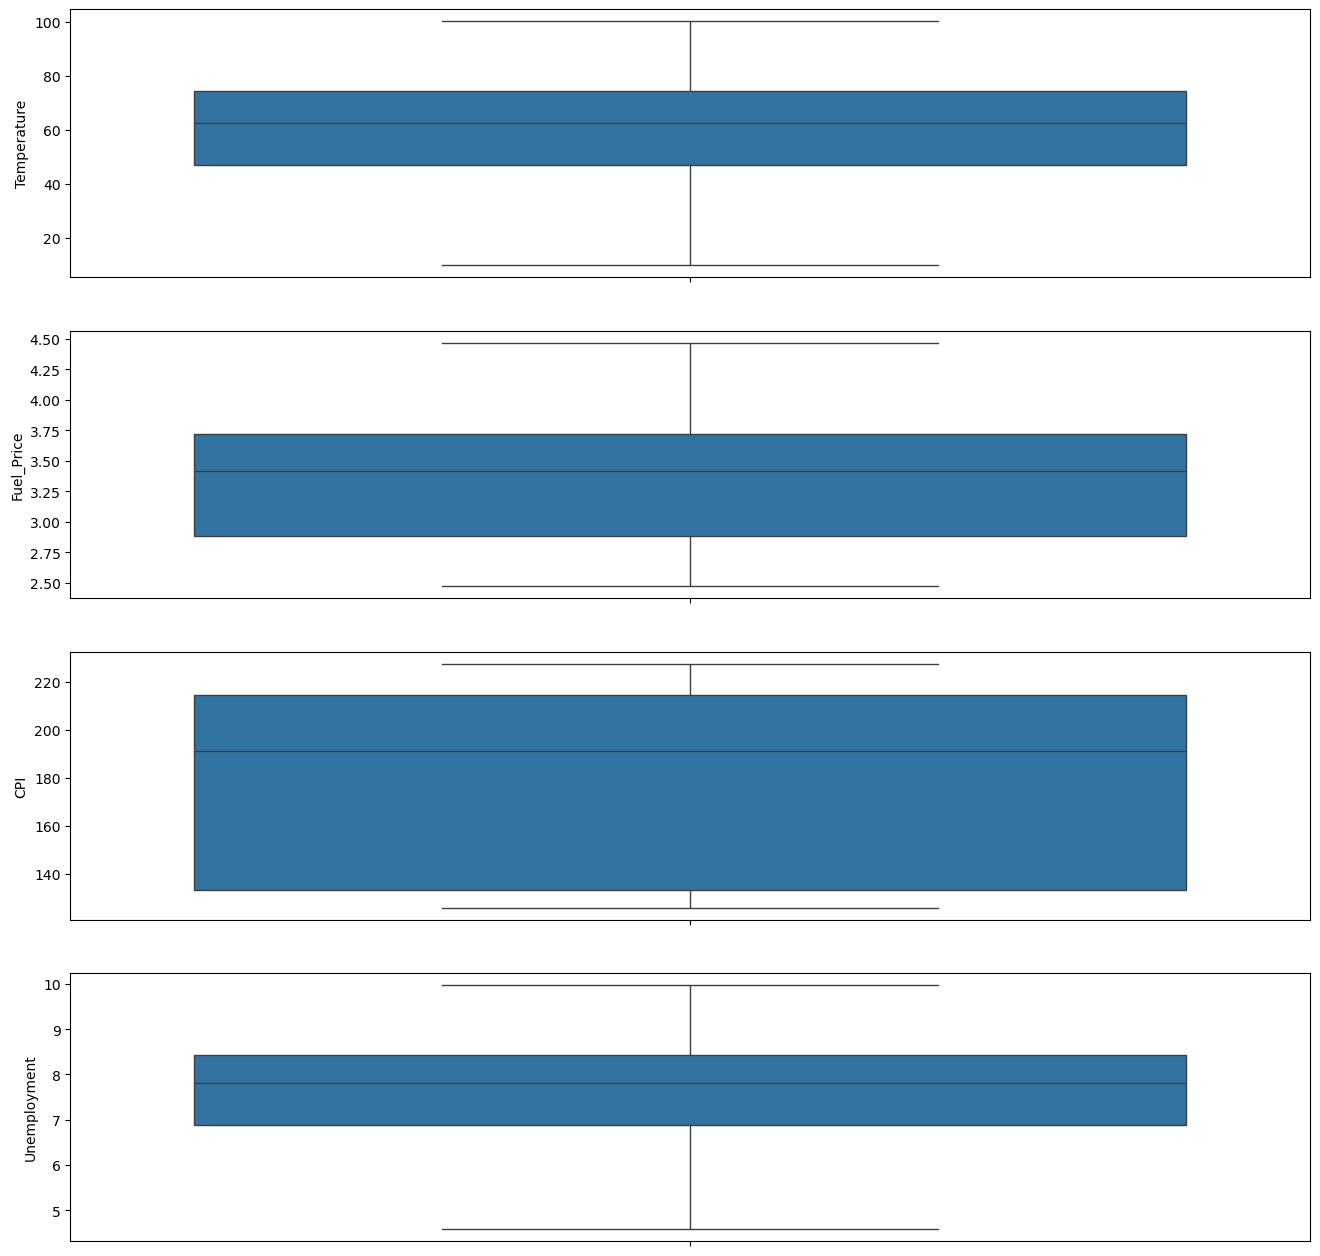

In [47]:
#Checking data for outliers
fig, axis = plt.subplots(4,figsize=(16,16))
X = df_clean[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df_clean[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')
plt.show()

In [48]:
# Linear Regression :
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
X = df_clean[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
Y = df_clean['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

Linear Regression:

Accuracy: 13.555023938042087
Mean Absolute Error: 445306.78534036316
Mean Squared Error: 283157955277.99805
Root Mean Squared Error: 532125.8829243303


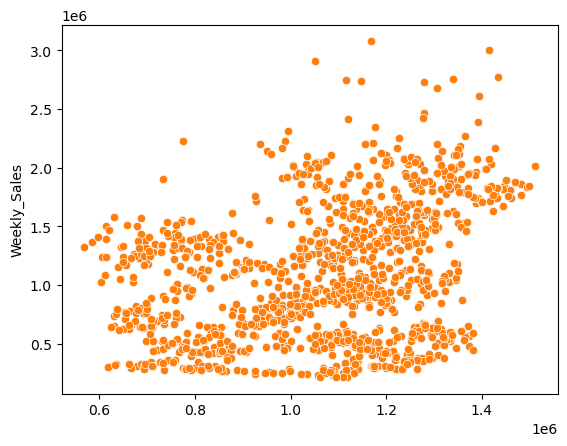

In [51]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, Y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
# Fix: Use named parameters x and y instead of positional arguments
sns.scatterplot(x=Y_pred, y=Y_test)

import warnings
warnings.filterwarnings('ignore')
plt.show()

Random Forest Regressor:

Accuracy: 94.66023188825137
Mean Absolute Error: 63426.963304416975
Mean Squared Error: 16851715514.56758
Root Mean Squared Error: 129814.15760450621


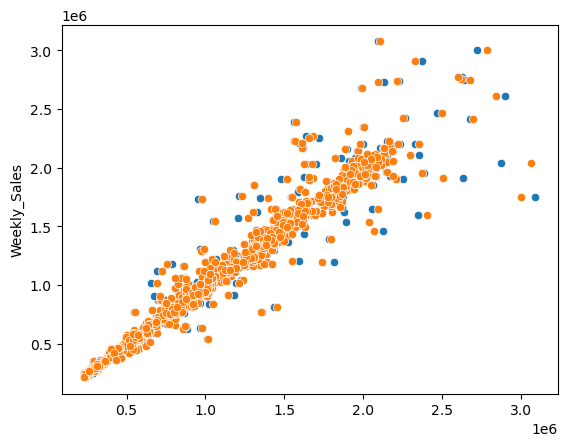

In [54]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
from sklearn import metrics

print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# Fixed scatterplot - use x and y parameters instead of positional arguments
sns.scatterplot(x=Y_pred, y=Y_test)  # Use named parameters x and y instead of positional arguments

import warnings
warnings.filterwarnings('ignore')
plt.show()